In [10]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="BTC_EHT"
pair2 = "BTC_XMR"
pair3 = "BTC_BCH"
pair4 = "BTC_STR"

ema_period = 6

start=string2ts("2018-02-25 00:00:00")
end=string2ts("2018-03-25 00:00:00")
period=3600*4

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

marketRet = marketReturn(df["close"])[-1]*100 
# para las graficas
cum_return1 = marketReturn(df["close"])

# calculando volatilidad en función del tamaño de las velas
volatility = makeVolatility(df,c=1.7)
volatility_dip = makeVolatility(df,c=5,type=1)

from strategy2 import pricevsEMA,pricevsEMA2
from profit import profit,profit2

#Precio vs EMA2
w3 = pricevsEMA2(df['close'], volatility, ema_period)
relativeReturn3,v3 = profit(w3)

#Precio vs EMA2 dip
w33 = pricevsEMA2(df['close'], volatility_dip, ema_period)
relativeReturn33,v33 = profit(w33)

#Precio vs EMA2 dip2
w34 = pricevsEMA2(df['close'], volatility_dip, ema_period, type=1)
relativeReturn34,v34 = profit(w34)

# price vs EMA
w2 = pricevsEMA(df['close'], ema_period)
relativeReturn2,v2 = profit(w2)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
print 'Retorno de price vs EMA: %s'%(relativeReturn2*100)
print 'Retorno de price vs EMA2: %s'%(relativeReturn3*100)
print 'Retorno de price vs EMA2 dip: %s'%(relativeReturn33*100)
print 'Retorno de price vs EMA2 dip2: %s'%(relativeReturn34*100)

PoloniexError: Invalid currency pair.

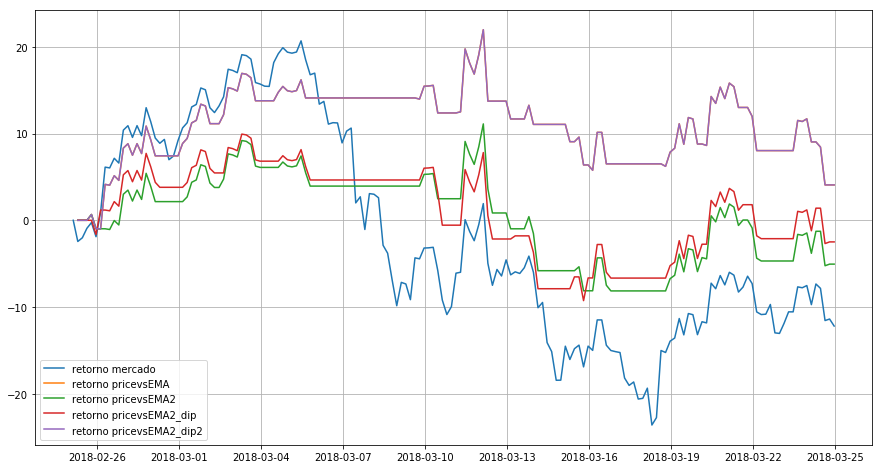

In [7]:
plt.plot(df.index[:],cum_return1*100, label='retorno mercado')
plt.plot(df.index[:],v2*100, label='retorno pricevsEMA')
plt.plot(df.index[:],v3*100, label='retorno pricevsEMA2')
plt.plot(df.index[:],v33*100, label='retorno pricevsEMA2_dip')
plt.plot(df.index[:],v34*100, label='retorno pricevsEMA2_dip2')
plt.legend(loc='best')
plt.grid()

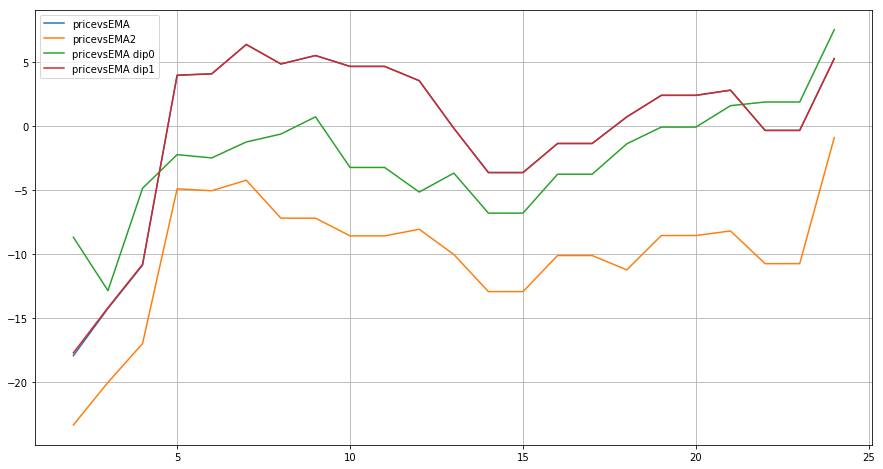

In [11]:
ema = []
ema2 =[]
ema22_type0 = []
ema22_type1 = []
c=5
intervalo = range(2,25)

for ema_period in intervalo:
#for c in intervalo:
        
        volatility_dip = makeVolatility(df,c=c,type=1)
        
        #Precio vs EMA2
        w3 = pricevsEMA2(df['close'], volatility, ema_period)
        relativeReturn3,v3 = profit(w3)
        
        #Precio vs EMA2 dip
        w33 = pricevsEMA2(df['close'], volatility_dip, ema_period)
        relativeReturn33,v33 = profit(w33)

        #Precio vs EMA2 dip2
        w34 = pricevsEMA2(df['close'], volatility_dip, ema_period, type=1)
        relativeReturn34,v34 = profit(w34)

        # price vs EMA
        w2 = pricevsEMA(df['close'], ema_period)
        relativeReturn2,v2 = profit(w2)
        
        ema.append(relativeReturn2*100)
        ema2.append(relativeReturn3*100)
        ema22_type0.append(relativeReturn33*100)
        ema22_type1.append(relativeReturn34*100)

plt.plot(intervalo,ema, label='pricevsEMA')
plt.plot(intervalo,ema2, label='pricevsEMA2')
plt.plot(intervalo,ema22_type0, label='pricevsEMA dip0')
plt.plot(intervalo,ema22_type1, label='pricevsEMA dip1')
plt.legend(loc='best')
plt.grid()

In [90]:
print len(intervalo), len(ema)


38 38


In [88]:
print ema_period

6
